# Keras for Boston house price 

In [1]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras import models, layers
from keras.datasets import boston_housing

Using TensorFlow backend.


In [2]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [3]:
print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


## Feature engineering 

In [4]:
scalar = StandardScaler()

In [5]:
scalar.fit(train_data)
train_data = scalar.transform(train_data)
test_data = scalar.transform(test_data)

## Training a model 

In [6]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape =  [train_data.shape[1]]))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])

In [7]:
num_epochs = 500

In [8]:
history = model.fit(train_data, train_targets, 
                    epochs = num_epochs, batch_size = 1, 
                    validation_split=0.2, 
                   verbose = False)

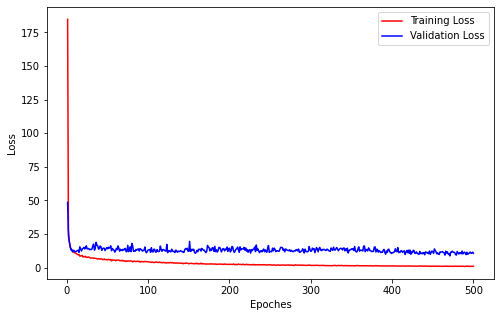

In [9]:
history_dict = history.history
epoches = range(1, 1 + num_epochs)

loss_training = history_dict['loss']
loss_validation = history_dict['val_loss']

plt.figure(figsize = (8, 5))
plt.plot(epoches, loss_training, 'r')
plt.plot(epoches, loss_validation, 'b')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.show()

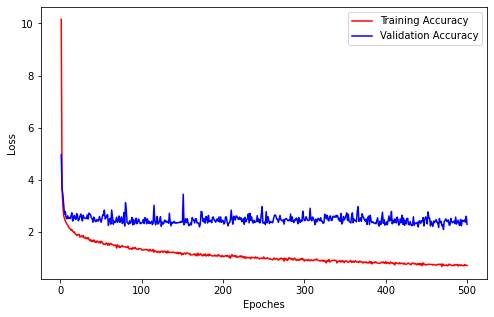

In [10]:
acc_training = history_dict['mae']
acc_validation = history_dict['val_mae']

plt.figure(figsize = (8, 5))
plt.plot(epoches, acc_training, 'r')
plt.plot(epoches, acc_validation, 'b')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.show()